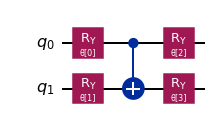

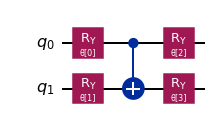

In [2]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=2, reps=1, entanglement='linear').decompose()
ansatz.draw('mpl', style='iqx')

In [3]:
from qiskit.opflow import Z, I

hamiltonian = Z ^ Z

In [4]:
from qiskit.opflow import StateFn

expectation = StateFn(hamiltonian, is_measurement=True) @ StateFn(ansatz)

In [5]:
import numpy as np

point = np.random.random(ansatz.num_parameters)
index = 2

In [6]:
from qiskit import Aer
from qiskit.utils import QuantumInstance

backend = Aer.get_backend('qasm_simulator')
q_instance = QuantumInstance(backend, shots = 8192, seed_simulator = 2718, seed_transpiler = 2718)

In [1]:
from qiskit.opflow import PauliExpectation, CircuitSampler

expectation = StateFn(hamiltonian, is_measurement=True) @ StateFn(ansatz)
in_pauli_basis = PauliExpectation().convert(expectation)
sampler = CircuitSampler(q_instance)

def evaluate_expectation(x):
    value_dict = dict(zip(ansatz.parameters, x))
    result = sampler.convert(in_pauli_basis, params=value_dict).eval()  
    return np.real(result)

NameError: name 'StateFn' is not defined

In [ ]:
eps = 0.2
e_i = np.identity(point.size)[:, index]  # identity vector with a 1 at index ``index``, otherwise 0

plus = point + eps * e_i
minus = point - eps * e_i